# Visualize

In [64]:
def imshow(img, title=None, image_width=10, axis=False,
           color_space="RGB", cmap=None, cols=1, save_to=None,
           hspace=0.2, wspace=0.2,
           use_original_sytle=False, invert=False):
    """
    Visualizes one or multiple images.

    Image will be reshaped: [batch_size/images, width, height, channels]

    ---
    Parameters:
    - img : np.ndarray
        Images/Images with [width, height, channels] or for multiple: [batch_size/images, width, height, channels].
    - title : str, optional (default=None)
        Title of the whole plot.
    - image_width : int, optional (default=5)
        Width of one image in the plot.
    - axis : bool, optional (default=False)
        Whether to print the axis of the images or not.
    - color_space : str, optional (default="RGB")
        The colorspace of the image: RGB, BGR, gray, HSV.
    - cmap : str, optional (default=None)
        Which cmap to use. Check all cmaps here out: https://matplotlib.org/stable/users/explain/colors/colormaps.html
    - cols : int, optional (default=1)
        Amount of columns in the plot.
    - save_to : str, optional (default=None)
        Path where to save the result image.
    - hspace : float, optional (default=0.01)
        Horizontal space between the images.
    - wspace : float, optional (default=0.01)
        Vertical space between the images.
    - use_original_sytle : bool, optonial (default=False)
        Whether the plot should use the current active matplotlib style or choosing a own one. 
    - invert : bool, optional (default=False)
        Whether to invert the images or not.
    """
    original_style = plt.rcParams.copy()

    img_shape = img.shape
    print(f"Got images with shape: {img_shape}")

    # tranform the image to the right form
    if len(img_shape) == 2:
        img = np.reshape(img, shape=(1, img.shape[0], img.shape[1], 1))
    elif len(img_shape) == 3:
        # check if multiple gray images or multiple images with channel
        # if img.shape[2] < img.shape[0] and img.shape[1] == img.shape[2]:
        img = np.reshape(img, shape=(1, img.shape[0], img.shape[1], img.shape[2]))
        # else:
        #     # there could be cases where this is wrong
        #     img = np.reshape(img, shape=(img.shape[0], img.shape[1], img.shape[2], 1))
    elif len(img_shape) != 4:
        raise ValueError(f"Image(s) have wrong shape! Founded shape: {img.shape}.")

    print(f"Transformed shape to: {img_shape}")

    # invert images
    if invert:
        print("Invert images...")
        max_value = 2**(img.dtype.itemsize * 8) -1
        scaling_func = lambda x: max_value - x
        img = np.apply_along_axis(scaling_func, axis=0, arr=img)

    # Set visualization settings
    # aspect_ratio_width = img.shape[1] / img.shape[2]
    aspect_ratio = img.shape[2] / img.shape[1]

    n_images = img.shape[0]
    rows = n_images//cols + int(n_images % cols > 0)

    width = int(image_width * cols)
    height = int(image_width * rows * aspect_ratio)

    # set plt style
    if not use_original_sytle:
        plt_style = 'seaborn-v0_8' if 'seaborn-v0_8' in plt.style.available else np.random.choice(plt.style.available)
        plt.style.use(plt_style)
        print(f"Using '{plt_style}' plotting style.")

    # plotting
    print(f"Making you a beautiful plot...")
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(width, height))
    try:
        ax = ax.ravel()
    except AttributeError:
        ax = [ax]
    fig.subplots_adjust(hspace=hspace, wspace=wspace)
    if type(title) == str:
        fig.suptitle(title, fontsize=128, y=0.95)

    for idx in range(len(ax)):
        cur_ax = ax[idx]

        if idx >= len(img):
            cur_ax.axis("off")
            continue

        cur_img = img[idx]

        if color_space.lower() == "bgr":
            cur_img = cv2.cvtColor(cur_img, cv2.COLOR_BGR2RGB)
            used_cmap = None
        elif color_space.lower() == "rgb":
            cur_img = cur_img
            used_cmap = None
        elif color_space.lower() == "hsv":
            cur_img = cv2.cvtColor(cur_img, cv2.COLOR_HSV2RGB)
            used_cmap = None
        elif color_space.lower() in ["gray", "grey", "g"]:
            if len(cur_img.shape) == 3 and cur_img.shape[2]:
                cur_img = cv2.cvtColor(cur_img, cv2.COLOR_RGB2GRAY)
            else:
                cur_img = cur_img
            print(cur_img.shape)
            used_cmap = "gray"

        if cmap:
            used_cmap = cmap

        if type(title) in [list, tuple]:
            cur_ax.set_title(title[idx], fontsize=64)
        if axis == False:
            cur_ax.axis("off")

        cur_ax.imshow(cur_img, cmap=used_cmap)

    if save_to:
        os.makedirs(os.path.split(save_to)[0], exist_ok=True)
        fig.savefig(save_to, dpi=300)

    plt.show()

    if not use_original_sytle:
        # reset to original plt style
        plt.rcParams.update(original_style)

In [76]:
import os

root_dir = "../res/examples"
images = [cv2.imread(os.path.join(root_dir, img)) for img in os.listdir(root_dir)]

Got images with shape: (256, 256, 3)
Transformed shape to: (256, 256, 3)
Invert images...
Using 'seaborn-v0_8' plotting style.
Making you a beautiful plot...
(256, 256)


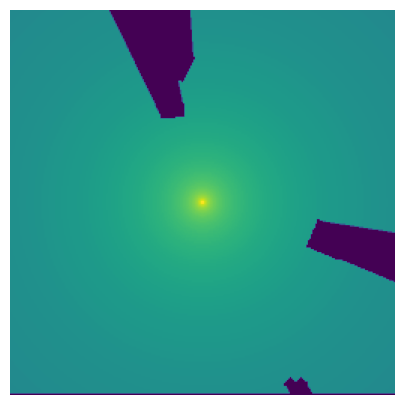

Got images with shape: (256, 256, 3)
Transformed shape to: (256, 256, 3)
Invert images...
Using 'seaborn-v0_8' plotting style.
Making you a beautiful plot...
(256, 256)


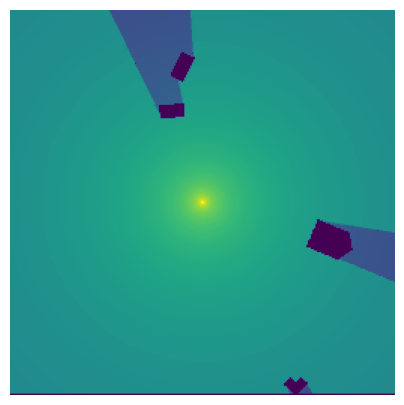

Got images with shape: (256, 256, 3)
Transformed shape to: (256, 256, 3)
Invert images...
Using 'seaborn-v0_8' plotting style.
Making you a beautiful plot...
(256, 256)


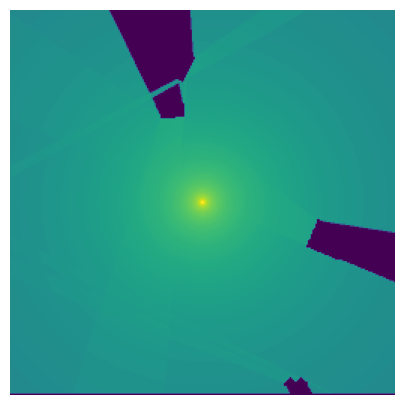

Got images with shape: (256, 256, 3)
Transformed shape to: (256, 256, 3)
Invert images...
Using 'seaborn-v0_8' plotting style.
Making you a beautiful plot...
(256, 256)


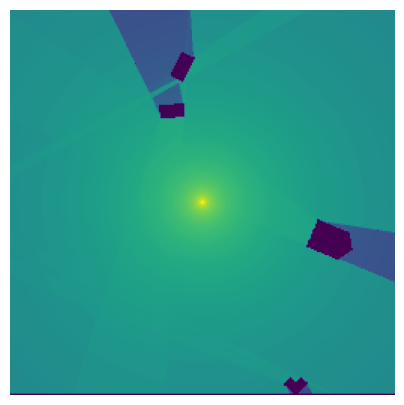

Got images with shape: (512, 512, 3)
Transformed shape to: (512, 512, 3)
Invert images...
Using 'seaborn-v0_8' plotting style.
Making you a beautiful plot...
(512, 512)


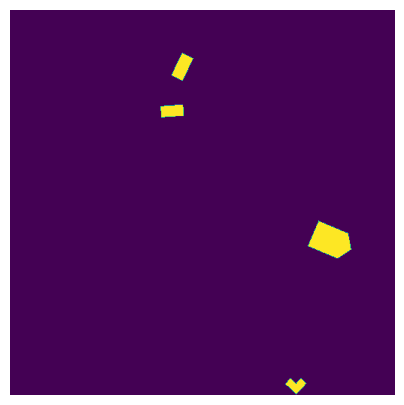

In [77]:
for image in images:
    imshow(image, title=None, image_width=5, axis=False,
            color_space="gray", cmap="viridis",  cols=1, save_to=None,
            hspace=0.01, wspace=0.01,
            use_original_sytle=False, invert=True)

Got images with shape: (256, 256, 3)
Transformed shape to: (256, 256, 3)
Invert images...
Using 'seaborn-v0_8' plotting style.
Making you a beautiful plot...
(256, 256)


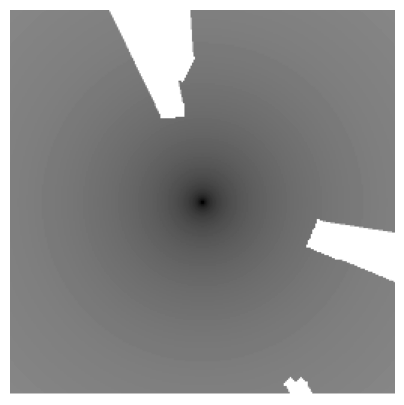

Got images with shape: (256, 256, 3)
Transformed shape to: (256, 256, 3)
Invert images...
Using 'seaborn-v0_8' plotting style.
Making you a beautiful plot...
(256, 256)


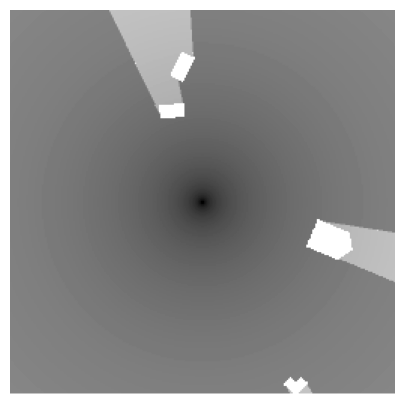

Got images with shape: (256, 256, 3)
Transformed shape to: (256, 256, 3)
Invert images...
Using 'seaborn-v0_8' plotting style.
Making you a beautiful plot...
(256, 256)


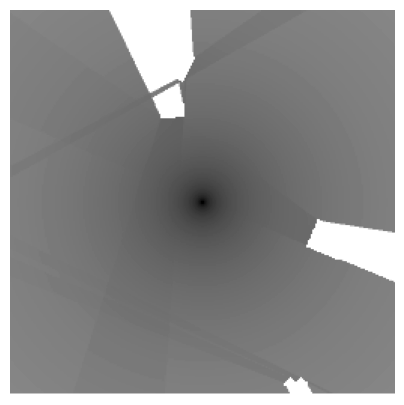

Got images with shape: (256, 256, 3)
Transformed shape to: (256, 256, 3)
Invert images...
Using 'seaborn-v0_8' plotting style.
Making you a beautiful plot...
(256, 256)


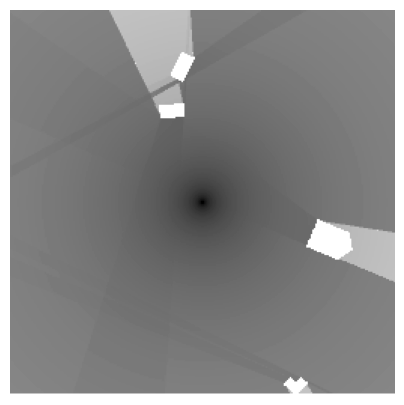

Got images with shape: (512, 512, 3)
Transformed shape to: (512, 512, 3)
Invert images...
Using 'seaborn-v0_8' plotting style.
Making you a beautiful plot...
(512, 512)


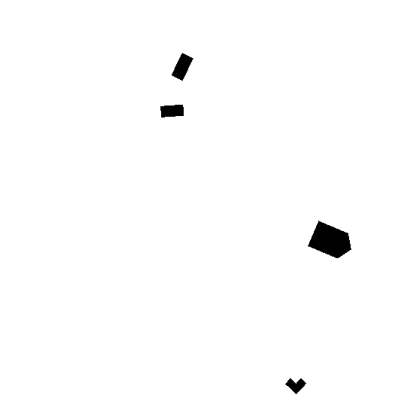

In [80]:
for image in images:
    imshow(image, title=None, image_width=5, axis=False,
            color_space="gray", cmap="binary",  cols=1, save_to=None,
            hspace=0.01, wspace=0.01,
            use_original_sytle=False, invert=True)